In [146]:
#libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import datetime
import math
import seaborn as sns
import random
from scipy import stats

Bii)

In [19]:
#get Data set into a data frame and change dates to datetime object 
df_p1 = pd.read_csv('LaqnData.csv',parse_dates=True)
df_p2 = pd.read_csv('LaqnData (1).csv',parse_dates=True)

#get rides of n/a values
df_p1 = df_p1.dropna()
df_p2 = df_p2.dropna()

In [20]:
#combine both data set 
df_combine = pd.concat([df_p1, df_p2], axis=0, ignore_index=True)

Biii)

In [21]:
#pivoting data to create a rectangular format 
df = df_combine.pivot_table(index='ReadingDateTime',columns='Species',values='Value')
df=df.dropna()
df.reset_index(inplace=True)
df_n = df.select_dtypes(include=['number'])

In [22]:
df.describe()

Species,FINE,NO,NO2,NOX,PM1,PM10,PM2.5,TSP
count,17726.000000,17726.000000,17726.000000,17726.000000,17726.000000,17726.000000,17726.000000,17726.00000
mean,8.574777,3.331310,17.247371,22.355427,6.378038,13.458524,8.089501,17.58496
std,6.688968,8.818201,13.378033,23.824427,6.216431,8.664669,6.310303,11.52608
min,0.300000,-1.300000,-1.700000,-0.600000,0.200000,0.500000,0.300000,0.50000
25%,4.500000,0.900000,8.100000,10.025000,2.800000,7.800000,4.300000,10.20000
50%,6.600000,1.700000,13.600000,16.300000,4.200000,11.300000,6.250000,14.70000
75%,10.400000,3.000000,22.200000,26.500000,7.300000,16.700000,9.800000,21.70000
max,64.200000,208.300000,145.700000,392.000000,58.600000,84.800000,60.500000,124.90000


Ci ) 

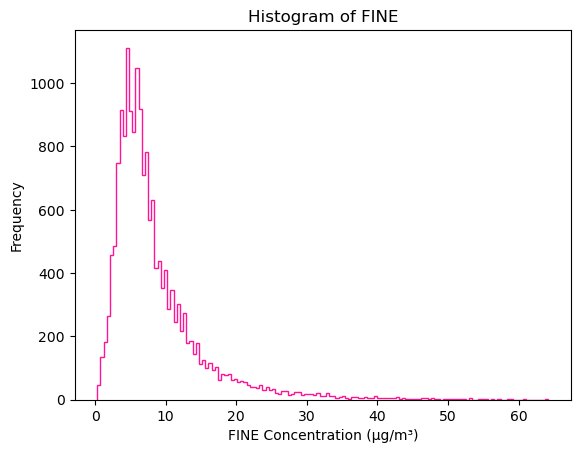

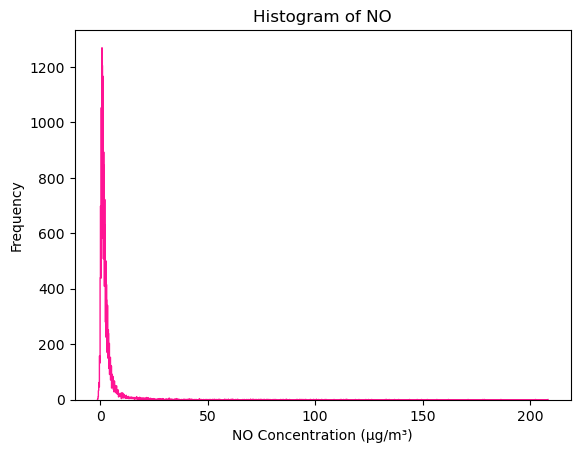

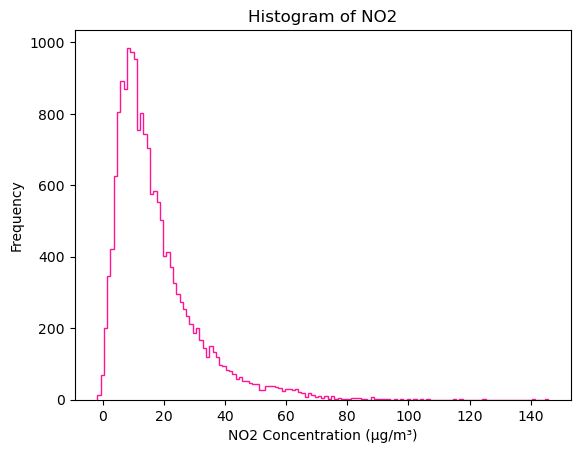

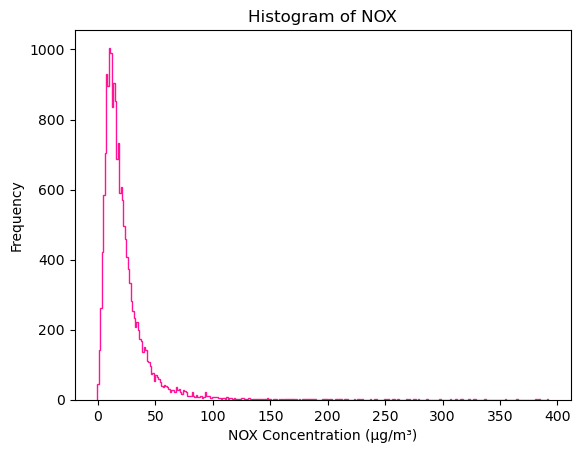

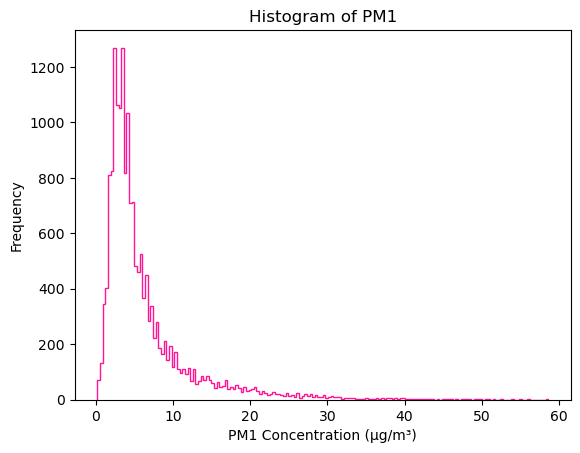

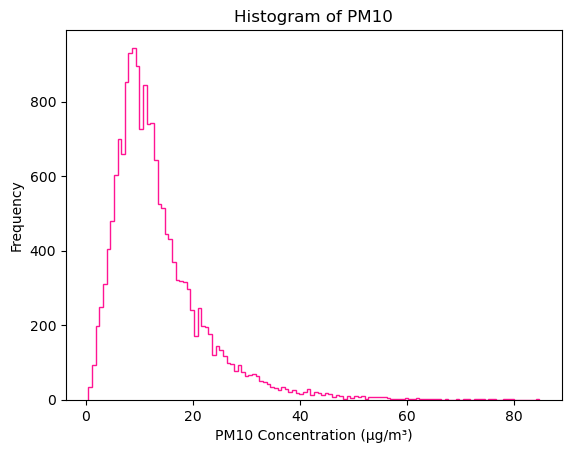

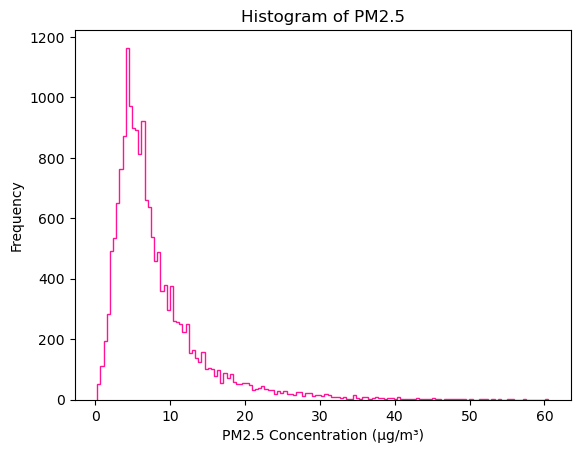

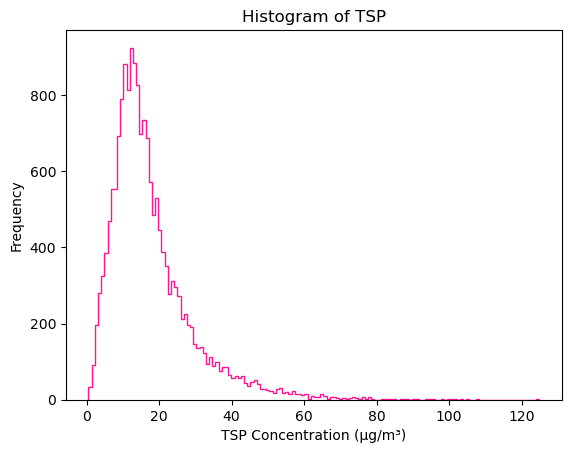

In [23]:
#adding column names in a list 
col_list = df_n.columns.tolist()
bin_list = list()

#creating a loop 
for i in col_list:
    #Freedman-Diaconis Method 
    iqr_v = (df_n[i].quantile(0.75)) - (df_n[i].quantile(0.25)) 
    n = len(df_n[i])
    bin_w = ((2*iqr_v)/(n**(1/3)))

    #number of bins 
    n_bins = math.ceil((max(df_n[i]) - min(df_n[i])) / bin_w) 
    bin_list.append(n_bins)
    
    #creating Histogram plot 
    plt.plot()
    plt.hist(df_n[i],n_bins,color='deeppink',histtype='step')
    plt.title(f'Histogram of {i}')
    plt.xlabel(f'{i} Concentration (µg/m³)')
    plt.ylabel('Frequency')
    plt.show()

Two groups for similar

1 - FINE, PM1, PM10, PM2_5

2 - NO, NO2, TSP

No similarity = NOX


In [24]:
#to find which pollutant belong to which bin width 
print(col_list)
print(bin_list)

['FINE', 'NO', 'NO2', 'NOX', 'PM1', 'PM10', 'PM2.5', 'TSP']
[142, 1302, 137, 311, 170, 124, 143, 142]


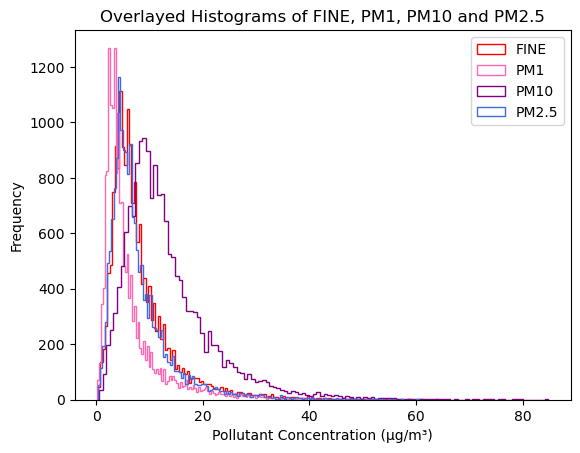

In [25]:
#Group 1
plt.plot()
plt.hist(df['FINE'],bin_list[0],label='FINE',color='red',histtype='step')
plt.hist(df['PM1'],bin_list[4],label='PM1',color='hotpink',histtype='step')
plt.hist(df['PM10'],bin_list[5],label='PM10',color='purple',histtype='step')
plt.hist(df['PM2.5'],bin_list[6],label='PM2.5',color='royalblue',histtype='step')
plt.xlabel('Pollutant Concentration (µg/m³)')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms of FINE, PM1, PM10 and PM2.5')
plt.legend()
plt.show()

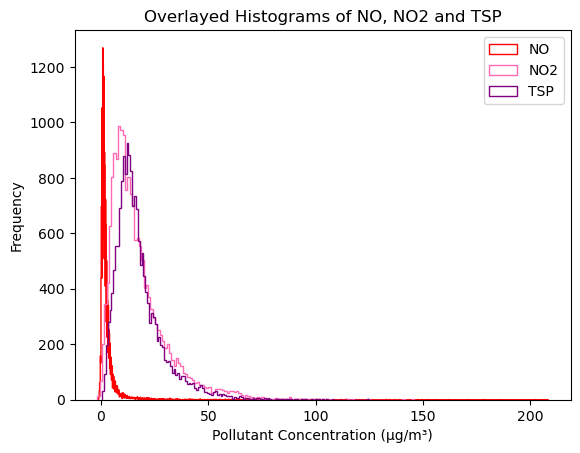

In [113]:
#Group 2
plt.plot()
plt.hist(df['NO'],bin_list[1],label='NO',color='red',histtype='step')
plt.hist(df['NO2'],bin_list[2],label='NO2',color='hotpink',histtype='step')
plt.hist(df['TSP'],bin_list[7],label='TSP',color='purple',histtype='step')
plt.xlabel('Pollutant Concentration (µg/m³)')
plt.ylabel('Frequency')
plt.title('Overlayed Histograms of NO, NO2 and TSP')
plt.legend()
plt.show()

Cii)

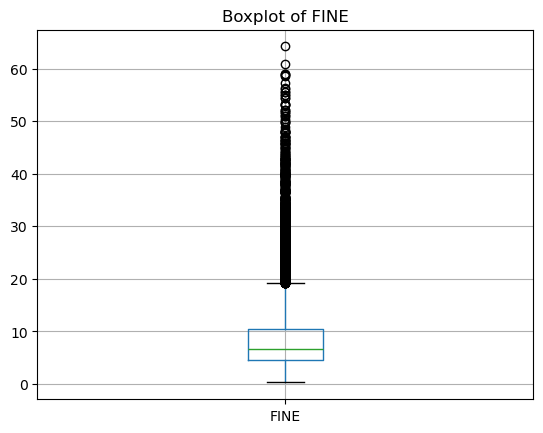

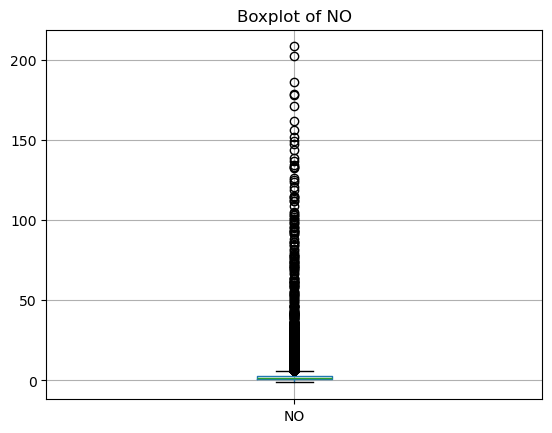

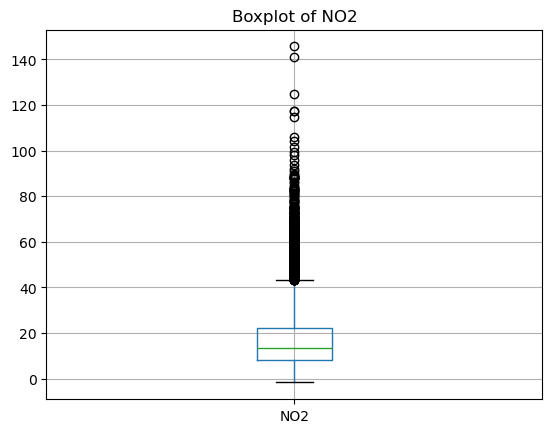

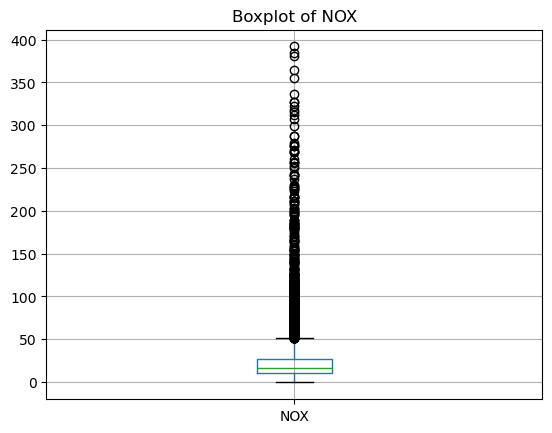

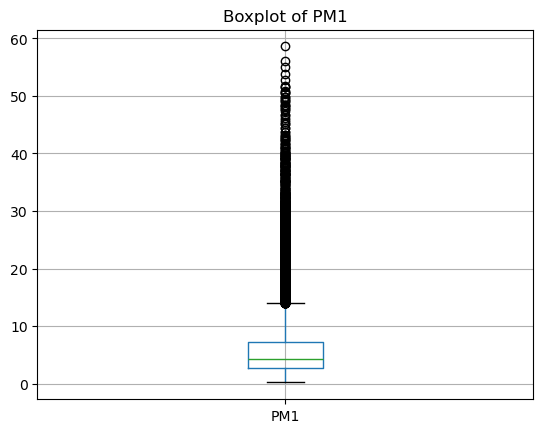

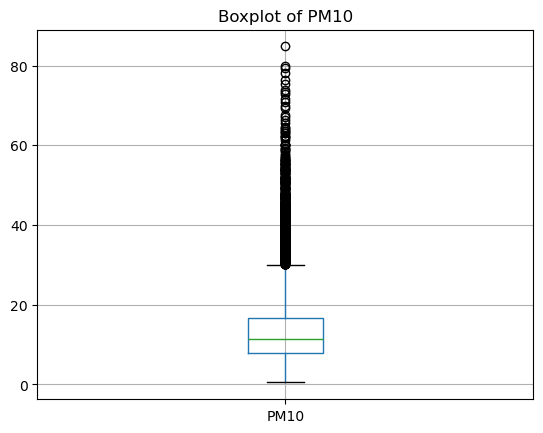

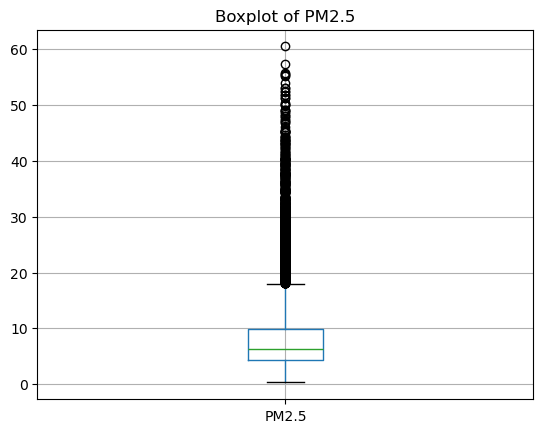

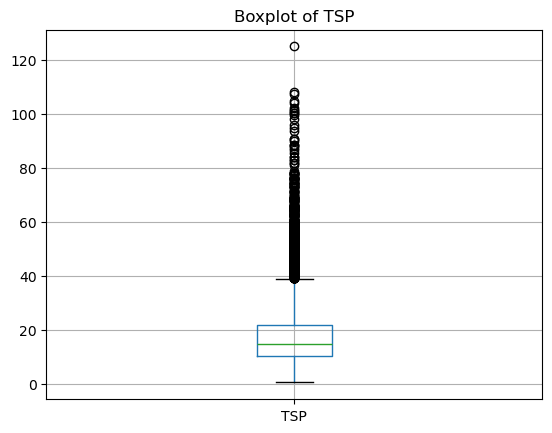

In [27]:
#boxplot for each species using a loop 
for i in col_list:
    plt.plot()
    df.boxplot(column=i)
    plt.title(f'Boxplot of {i}')
    plt.show()

ciii)

In [28]:
#pearson correlation matrix 
corr_matrix = df_n.corr(method='pearson')
print(corr_matrix)

Species      FINE        NO       NO2       NOX       PM1      PM10     PM2.5  \
Species                                                                         
FINE     1.000000  0.398591  0.541053  0.530027  0.980609  0.927023  0.999979   
NO       0.398591  1.000000  0.568987  0.887016  0.406962  0.378095  0.398538   
NO2      0.541053  0.568987  1.000000  0.884404  0.553332  0.526071  0.541000   
NOX      0.530027  0.887016  0.884404  1.000000  0.541673  0.509980  0.529967   
PM1      0.980609  0.406962  0.553332  0.541673  1.000000  0.860960  0.980626   
PM10     0.927023  0.378095  0.526071  0.509980  0.860960  1.000000  0.926998   
PM2.5    0.999979  0.398538  0.541000  0.529967  0.980626  0.926998  1.000000   
TSP      0.790676  0.340911  0.484964  0.465797  0.717838  0.954675  0.790641   

Species       TSP  
Species            
FINE     0.790676  
NO       0.340911  
NO2      0.484964  
NOX      0.465797  
PM1      0.717838  
PM10     0.954675  
PM2.5    0.790641  
TSP      

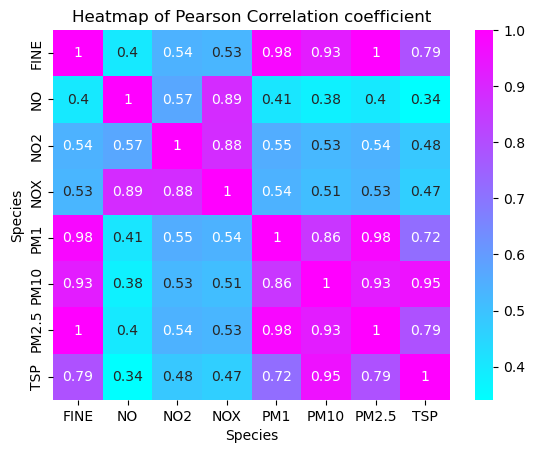

In [29]:
# creating a heatmap 
sns.heatmap(corr_matrix,annot=True,cmap='cool')
plt.title('Heatmap of Pearson Correlation coefficient')
plt.show()

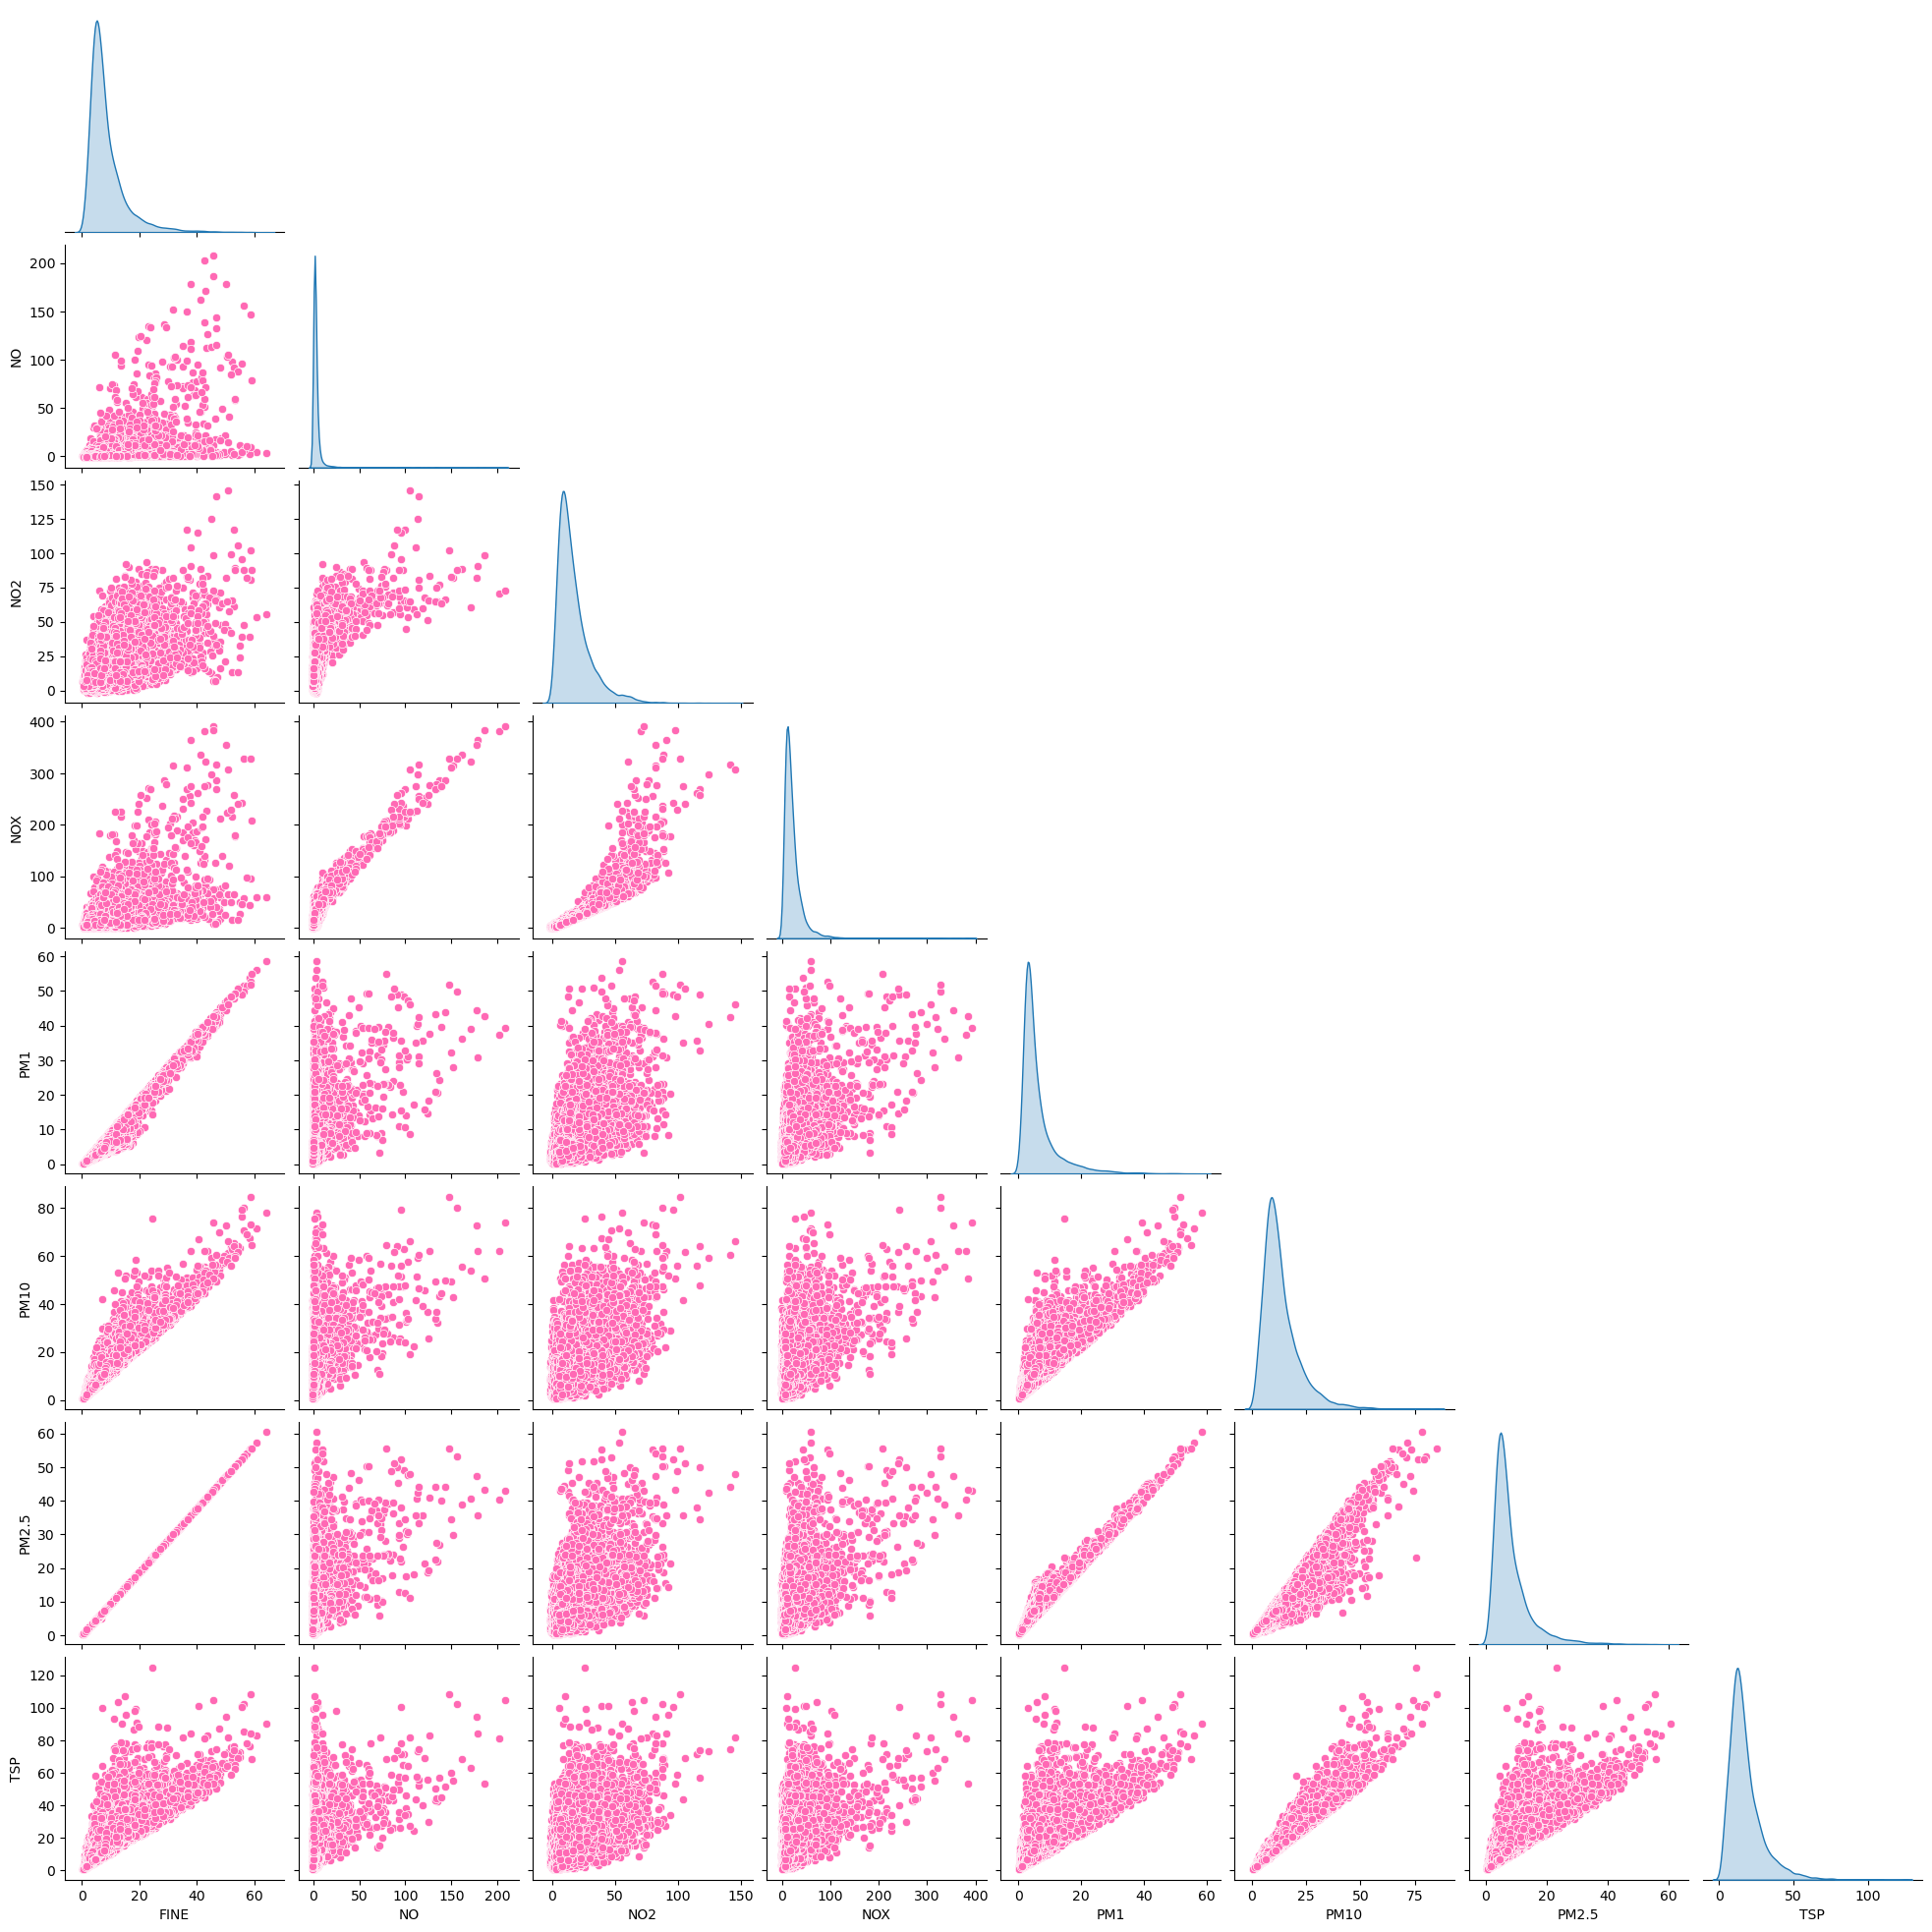

In [30]:
#creating pairplot
sns.pairplot(df_n, diag_kind='kde', corner=True, plot_kws={'color': 'hotpink'})
plt.show()

Civ)

In [31]:
#changing to datetime
df['ReadingDateTime'] = pd.to_datetime(df['ReadingDateTime'], errors='coerce')
#seperating dataframe by year
df22 = df.loc[ (df['ReadingDateTime'] >= '2022-01-01') & (df['ReadingDateTime'] < '2023-01-01')]
df22_n = df22.select_dtypes(include=['number'])
df23 = df.loc[ (df['ReadingDateTime'] >= '2023-01-01') & (df['ReadingDateTime'] < '2024-01-01')]
df23_n = df23.select_dtypes(include=['number'])
df24 = df.loc[ (df['ReadingDateTime'] >= '2024-01-01') & (df['ReadingDateTime'] < '2025-01-01')]
df24_n = df24.select_dtypes(include=['number'])

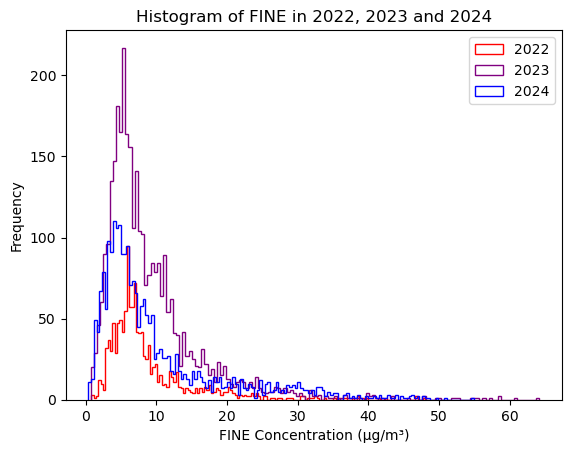

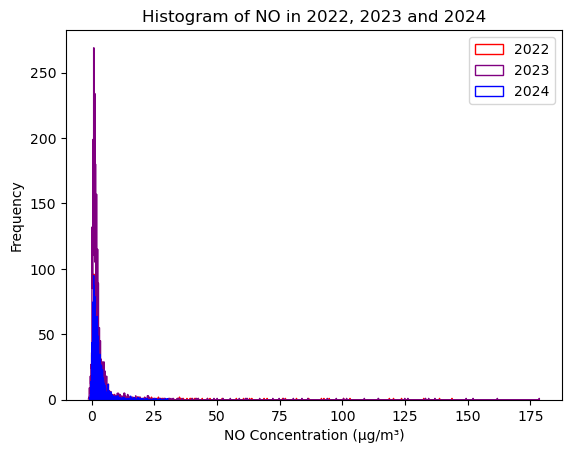

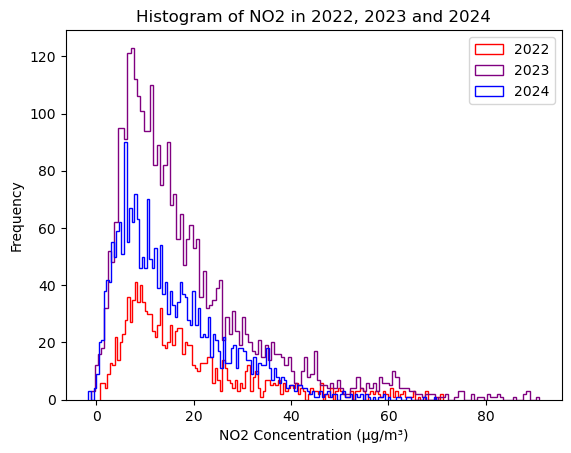

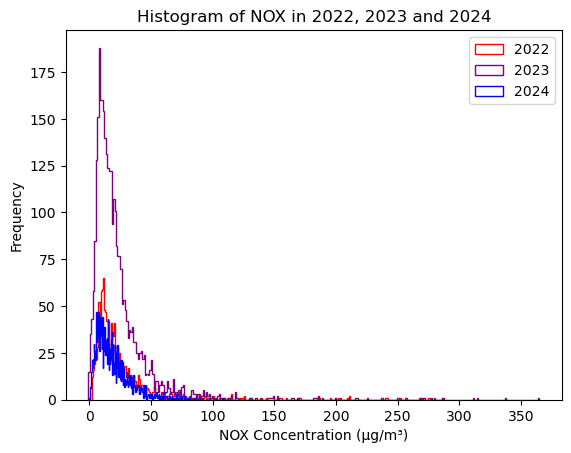

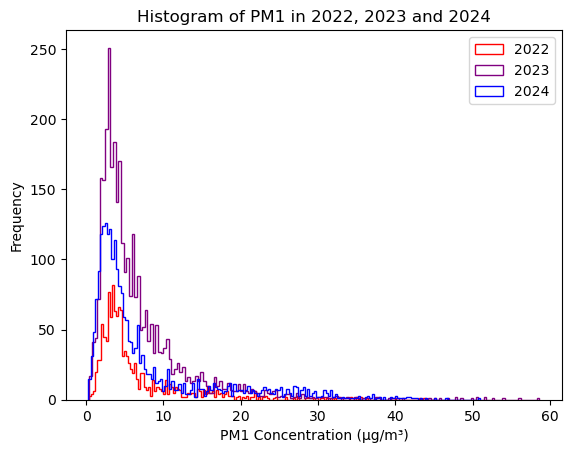

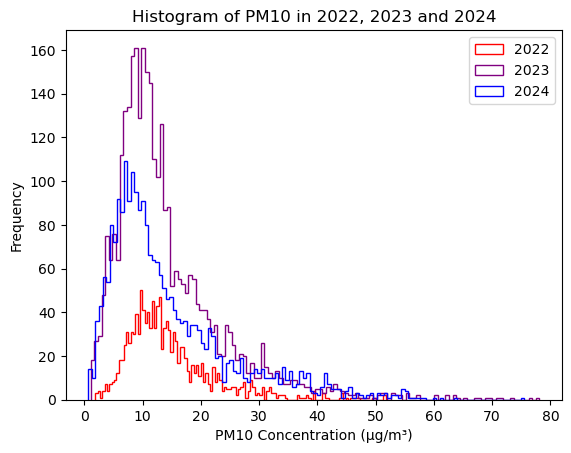

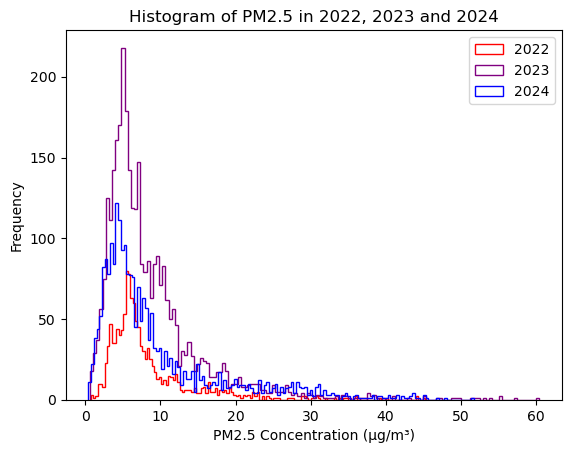

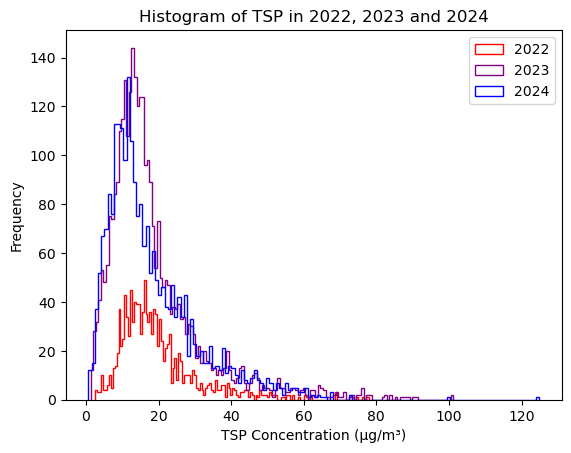

In [32]:
#best way to visulise is each polutant in a histogram with each year beinga differnt line 
#creating a loop 
bin_list_new=list()
for i in col_list:
    #Freedman-Diaconis Method 
    iqr_v = (df_n[i].quantile(0.75)) - (df_n[i].quantile(0.25)) 
    n = len(df_n[i])
    bin_w = ((2*iqr_v)/(n**(1/3)))

    #number of bins 
    n_bins = math.ceil((max(df_n[i]) - min(df_n[i])) / bin_w) 
    bin_list_new.append(n_bins)
    
    #creating Histogram plot 
    plt.plot()
    plt.hist(df22_n[i],n_bins,color='red',histtype='step',label='2022')
    plt.hist(df23_n[i],n_bins,color='purple',histtype='step',label='2023')
    plt.hist(df24_n[i],n_bins,color='blue',histtype='step',label='2024')
    plt.title(f'Histogram of {i} in 2022, 2023 and 2024')
    plt.xlabel(f'{i} Concentration (µg/m³)')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

D ) two polutant choses are PM2.5 and FINE and two year chosen are 2022/2024

In [149]:
#finding our length of each sample
#for pm10
n_fine = len(df22_n['FINE']) + len(df24_n['FINE'])
#for fine
n_pm2_5 = len(df22_n['PM2.5']) + len(df24_n['PM2.5'])

#create new data frame to combine both year and pollutant
df_fine =pd.concat([df22_n['FINE'], df24_n['FINE']], axis=0)
df_fine.reset_index(drop=True, inplace=True) 
df_pm2_5=pd.concat([df22_n['PM2.5'], df24_n['PM2.5']], axis=0)
df_pm2_5.reset_index(drop=True, inplace=True)
df_p_test = pd.concat([df_fine,df_pm2_5], axis=0)
df_p_test.reset_index(drop=True, inplace=True) 

#list to store the difference 
diff_fine = list()
diff_pm2_5 = list()

#function for the permutation test 
def perm_fun(x, nA, nB):
    n = nA + nB
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    mean_A =x.loc[list(idx_A)].mean()
    mean_B =x.loc[list(idx_B)].mean()
    return mean_B - mean_A

## rep function replicates elements of vectors and lists
listT = df_p_test
listT.reset_index(drop=True, inplace=True)
##print(listT)
perm_diffs = [perm_fun(listT, n_fine, n_pm2_5) for _ in range(1000)]

#mean of both pollutant 
mean_fine= df_fine.mean() 
mean_pm2_5 = df_pm2_5.mean() 
#observed difference 
obs_diff = mean_pm2_5 - mean_fine


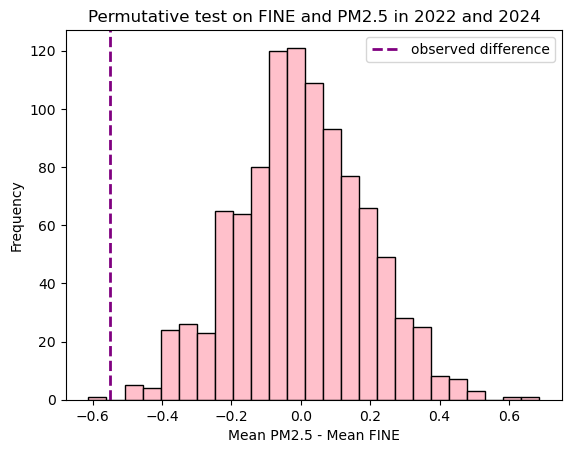

In [161]:
#create Histogram 
plt.plot
plt.hist(perm_diffs, bins=25,color='pink',edgecolor='black')
plt.title('Permutative test on FINE and PM2.5 in 2022 and 2024')
plt.axvline(obs_diff, color='purple',linewidth=2, linestyle='dashed',label='observed difference')
plt.xlabel('Mean PM2.5 - Mean FINE')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [151]:
#estimate p-value 

p_value = np.mean(np.abs(perm_diffs) >=  np.abs(obs_diff))
print(p_value)

0.003


In [152]:
#two sample t-test 
t_stat, t_p_value = stats.ttest_ind(df_fine, df_pm2_5)
print(t_stat)
print(t_p_value)

2.917520921961954
0.0035389151893888103
